## Import Necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Preprocess

In [35]:
data = pd.read_csv("loggedData.csv") # read csv
data = data.drop(data.columns[0], axis=1) # remove index
data['time'] = pd.to_datetime(data['time']) # convert to dt objects
time_deltas = data['time'].diff() # get differences in time stamps 
cum_time = time_deltas.dt.total_seconds().cumsum() # get cumulative time in seconds for plotting
ave_delta = time_deltas.mean() # get average time in program loop
data.loc[data['closure'] > 200, 'closure'] = None
data.loc[data['closure'] < -200, 'closure'] = None

print(data.head())

                        time  distance  closure      TTC    x
0 2025-04-10 01:20:40.579258       142     10.0  14.2000  2.0
1 2025-04-10 01:20:40.827244       139      NaN      inf  2.0
2 2025-04-10 01:20:41.099251       125     80.0   1.5625  2.0
3 2025-04-10 01:20:41.343220       110      NaN      inf  2.0
4 2025-04-10 01:20:41.583464        96      0.0      inf  2.0


## Visualize

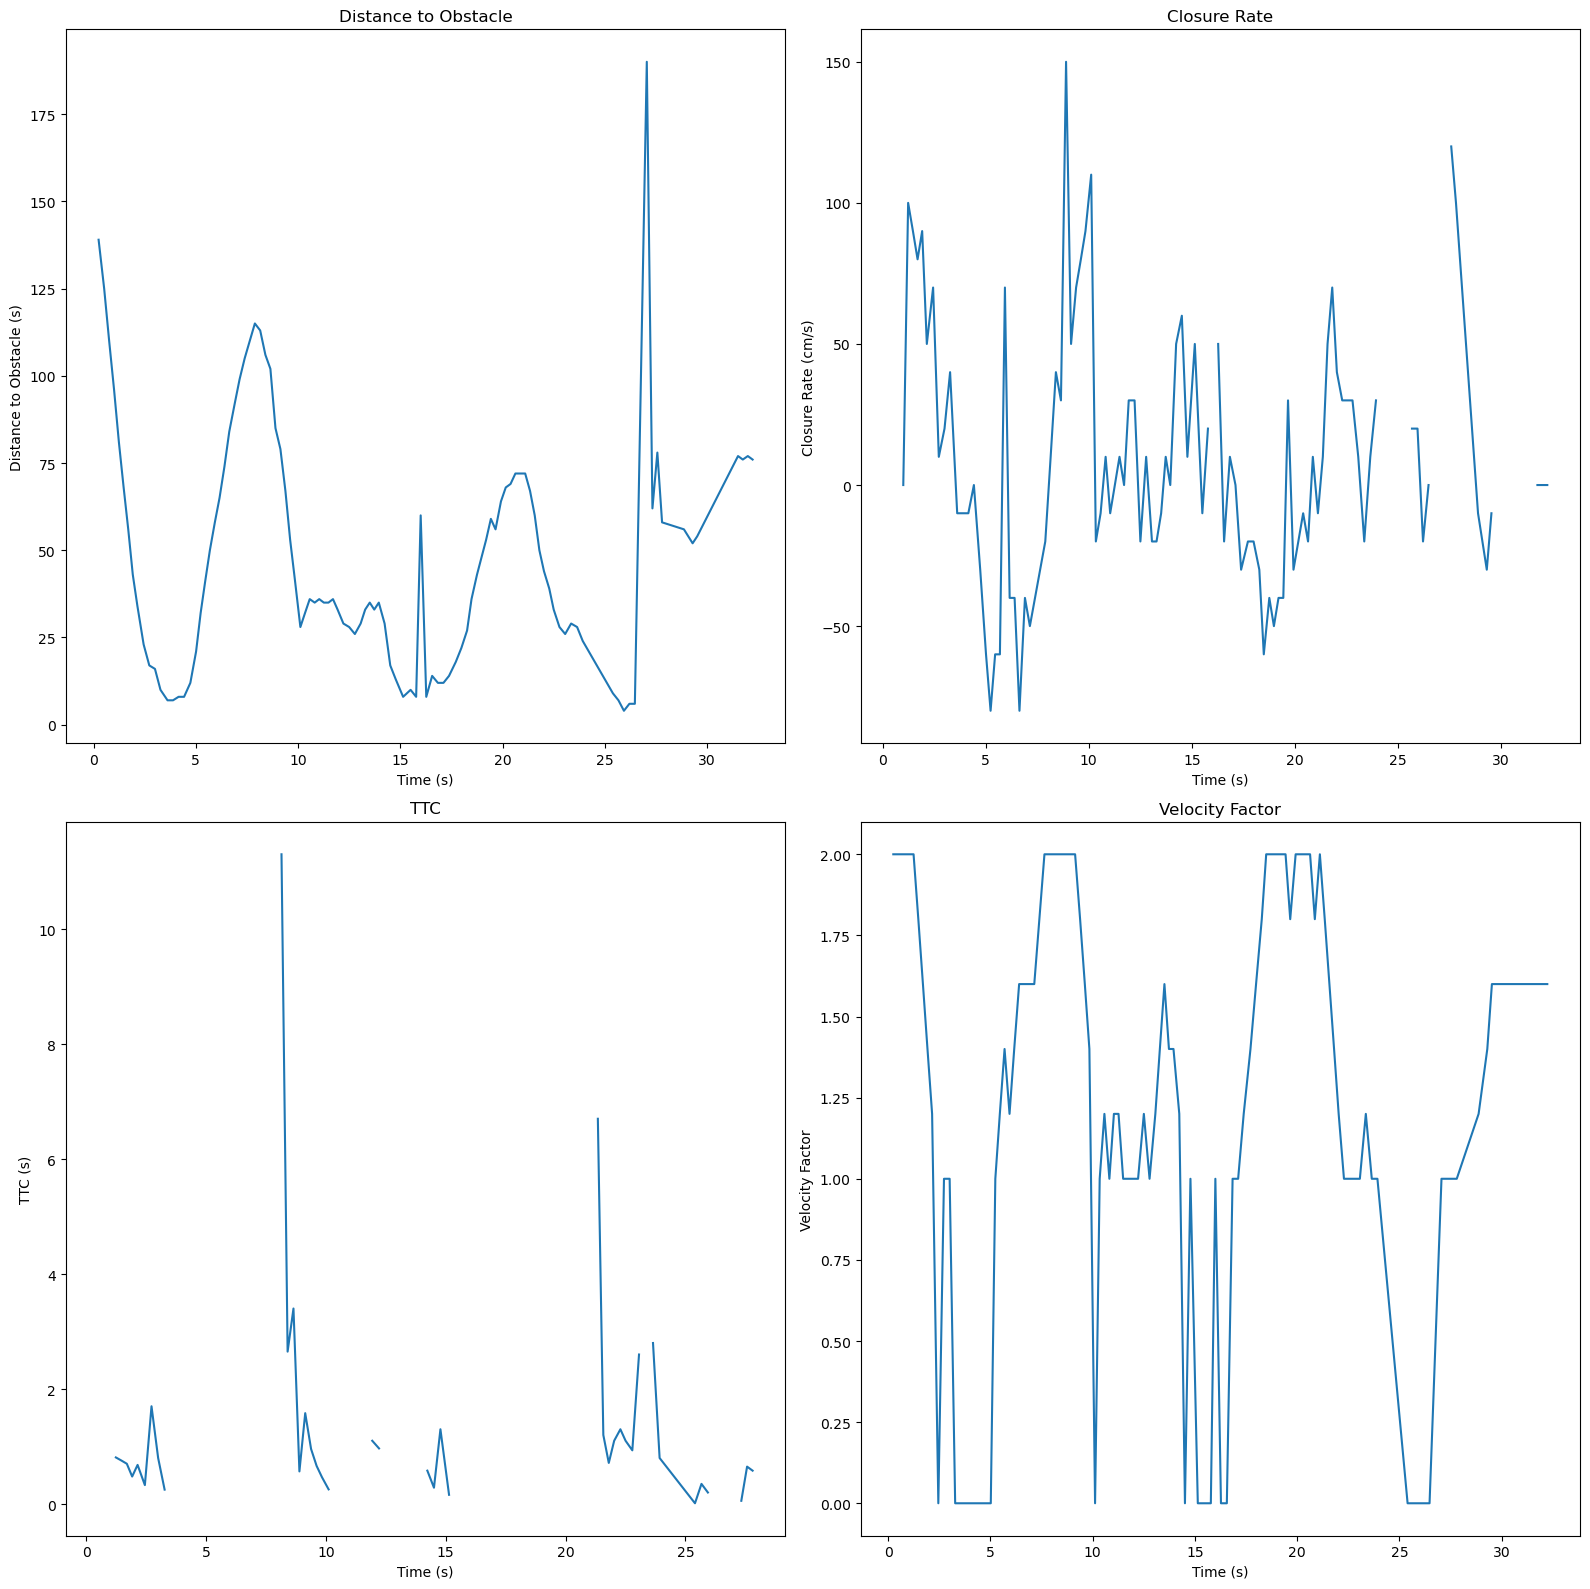

In [37]:
# Create a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

# Plotting
axs[0, 0].plot(cum_time, data['distance'])
axs[0, 0].set_title('Distance to Obstacle')
axs[0, 0].set_xlabel('Time (s)')  # Set x-axis label
axs[0, 0].set_ylabel('Distance to Obstacle (s)')  # Set y-axis label

axs[0, 1].plot(cum_time, data['closure'])
axs[0, 1].set_title('Closure Rate')
axs[0, 1].set_xlabel('Time (s)')  # Set x-axis label
axs[0, 1].set_ylabel('Closure Rate (cm/s)')  # Set y-axis label

axs[1, 0].plot(cum_time, data['TTC'])
axs[1, 0].set_title('TTC')
axs[1, 0].set_xlabel('Time (s)')  # Set x-axis label
axs[1, 0].set_ylabel('TTC (s)')  # Set y-axis label

axs[1, 1].plot(cum_time, data['x'])
axs[1, 1].set_title('Velocity Factor')
axs[1, 1].set_xlabel('Time (s)')  # Set x-axis label
axs[1, 1].set_ylabel('Velocity Factor')  # Set y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
